In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import glob
import seaborn as sns
from scipy import stats

from matplotlib import cm

In [2]:
with open('Caseinformation_w_20210121.txt') as f:
    # Iterate through the file until the table starts
    for line in f:
        if line.startswith(''):
            break
    # Read the rest of the data, using spaces to split. 
    data = [r.split() for r in f]

In [3]:
line

'          *date       Overpass      wb_1st_00      wb_1st_01      wb_1st_05      wb_2nd_00      wb_2nd_01      wb_2nd_05     percent_cb           wwml          wwmax      max_wskew          wstar        wspd_cb   max_duration  mean_duration        num_cld     num_cld_30 min_ww_percent   LCL_mean_met      Hcb_vceil\n'

In [4]:
data = np.array(data)

In [5]:
data = data.astype(np.float)

In [6]:
data = np.array(data)
data = data.astype(np.float)

date = data[:,0]
Overpass = data[:,1]
wb_1st_00 = data[:,2]
wb_1st_00_center = data[:,3]
wb_1st_00_side = data[:,4]

wb_1st_01  = data[:,5]
wb_1st_05  = data[:,6]
wb_2nd_00 = data[:,7]
wb_2nd_01 = data[:,8]
wb_2nd_05 = data[:,9]
percent_cb = data[:,10]
wwml = data[:,11]
wwmax    = data[:,12]   
max_wskew  = data[:,13]         
wstar  = data[:,14]   
wspd_cb  = data[:,15] 
max_duration  = data[:,16] 
mean_duration  = data[:,17]     
num_cld   = data[:,18]   
num_cld_30  = data[:,19]
min_ww_percent  = data[:,20]  
LCL_mean_met  = data[:,21]     
Hcb_vceil = data[:,22]

In [7]:
ind = np.where((min_ww_percent > 80.) & (max_duration < 1800.) & (num_cld_30 >= 5))

In [8]:
Path = 'D:/Results/Onetime/20200706_1stevidence_cb_sub_updraft_GRL/1st_draft_old_withLASSO/Data/'

tmp = glob.glob(Path + 'Composite_W_profile_WRF_20201017.nc')
filename = tmp[0]

fWRF = xr.open_dataset(filename)

wwml_WRF = fWRF['wwml'].values
tkeml_WRF = fWRF['tkeml'].values
wb_00_WRF = fWRF['wcl'].values
wb_01_WRF = fWRF['wcl_01'].values
wb_05_WRF = fWRF['wcl_05'].values
wstar_WRF = fWRF['wstar'].values
aclcb_WRF = fWRF['aclcb'].values
CIN_WRF = fWRF['CIN'].values

indWRF = np.where((100.*aclcb_WRF > 0.1) & 
               (100.*aclcb_WRF < 40.) & 
               (wb_05_WRF > 0) &
               (wstar_WRF > 0) &
               (tkeml_WRF > 0) &
               (CIN_WRF > -100.))

<ipython-input-8-52a14c9f46ac>:20: RuntimeWarning: invalid value encountered in greater
  (wstar_WRF > 0) &


In [9]:
tkeml_WRF[indWRF]

array([1.3039864 , 1.3675706 , 1.4062474 , 1.4720352 , 1.5543799 ,
       1.5932283 , 1.6077393 , 1.6292268 , 1.6619259 , 1.6990296 ,
       1.717161  , 1.7322315 , 1.743896  , 1.8131554 , 1.7831997 ,
       1.829722  , 1.8532387 , 1.9069633 , 1.9596447 , 1.9889838 ,
       1.9459791 , 2.0286367 , 2.0550337 , 2.0049717 , 1.940533  ,
       1.975911  , 1.9219015 , 1.8796039 , 1.8283288 , 1.8056661 ,
       1.7431622 , 1.7065396 , 1.7048166 , 1.6764133 , 1.6234097 ,
       1.5436159 , 1.4715148 , 1.4075025 , 1.3402367 , 1.2722181 ,
       1.2258744 , 1.1835696 , 1.1295738 , 1.0285175 , 0.9124988 ,
       0.8141242 , 0.74245805, 0.9833409 , 1.0447663 , 1.5170232 ,
       1.6492033 , 1.8372662 , 2.1018145 , 2.4402623 , 2.6875756 ,
       2.9062264 , 2.8832648 , 2.5441277 , 2.224516  , 2.0587528 ,
       1.9044728 , 1.8564339 , 1.8843358 , 1.8577118 , 1.8388733 ,
       1.8666781 , 1.8543407 , 1.8504877 , 1.8471535 , 1.8639739 ,
       1.8092486 , 1.7741266 , 1.7696642 , 1.7503066 , 1.66552

In [10]:
Path = 'D:/Results/Onetime/20200706_1stevidence_cb_sub_updraft_GRL/1st_draft_old_withLASSO/Data/'

tmp = glob.glob(Path + 'Composite_W_profile_SAM_20201017.nc')
filename = tmp[0]

fSAM = xr.open_dataset(filename)

wwml_SAM = fSAM['wwml'].values
tkeml_SAM = fSAM['tkeml'].values
wb_00_SAM = fSAM['wcl'].values
wb_01_SAM = fSAM['wcl_01'].values
wb_05_SAM = fSAM['wcl_05'].values
wstar_SAM = fSAM['wstar'].values
aclcb_SAM = fSAM['aclcb'].values
zcb_SAM = fSAM['zcb'].values
zmltop_SAM = fSAM['zmltop'].values
CIN_SAM = fSAM['CIN'].values

indSAM = np.where((100.*aclcb_SAM > 0.1) & 
               (100.*aclcb_SAM < 40.) & 
               (wb_05_SAM > 0) &
               (wwml_SAM > 0) &
               (tkeml_SAM > 0) &
               (zcb_SAM - zmltop_SAM < 0.5) &
               (CIN_SAM != -100.))

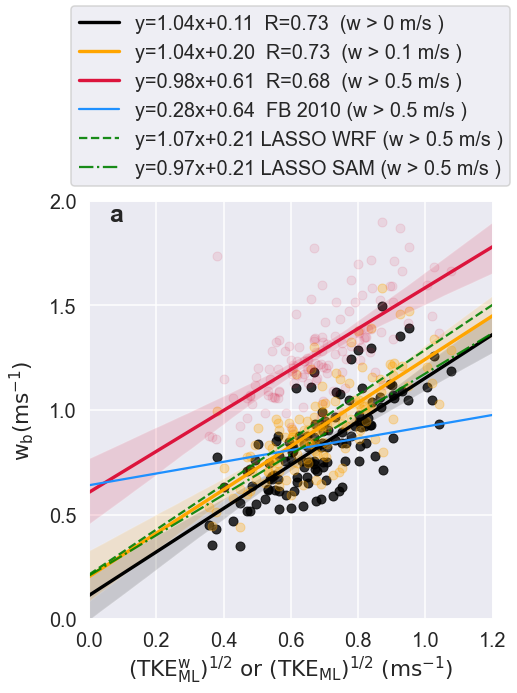

In [11]:
sns.set(context="talk", style="ticks", font_scale=1.2)
sns.set_style("darkgrid")

fig, axs = plt.subplots(1,1,figsize=[7, 7])

fig.tight_layout(w_pad=2., h_pad=2.5)

#observation
x = np.sqrt(0.5*wwml[ind])
y = wb_1st_00[ind]


axs.set_ylim((0., 2.))
axs.set_xlim((0., 1.2))

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

sns.regplot(x=x, y=y, ax = axs, line_kws={'label':"y={0:.2f}x+{1:.2f}  R={2:.2f}  (w > 0 m/s )".format(slope,intercept,r_value), "color": "black"},
           scatter_kws={"color": "black"}, truncate=False)

x = np.sqrt(0.5*wwml[ind])
y = wb_1st_01[ind]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

sns.regplot(x=x, y=y, ax = axs, scatter = True, truncate=False, line_kws={'label':"y={0:.2f}x+{1:.2f}  R={2:.2f}  (w > 0.1 m/s )".format(slope,intercept,r_value), "color": "orange"},
           scatter_kws={"color": "orange", 'alpha': 0.3})

x = np.sqrt(0.5*wwml[ind])
y = wb_1st_05[ind]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

sns.regplot(x=x, y=y, ax = axs, scatter = True, truncate=False, 
            line_kws={'label':"y={0:.2f}x+{1:.2f}  R={2:.2f}  (w > 0.5 m/s )".format(slope,intercept,r_value),
                      "color": "crimson"},
            scatter_kws={"color": "crimson", 'alpha': 0.1})

#Fletcher and Bretherton, 2010
x = np.array([0., 1.7])
yfit_FB = 0.28*x + 0.64

axs.plot(x, yfit_FB, color = 'dodgerblue', label = "y={0:.2f}x+{1:.2f}  FB 2010 (w > 0.5 m/s )".format(0.28,0.64))


#LASSO
x = np.sqrt(tkeml_WRF[indWRF])
y = wb_05_WRF[indWRF]

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

x = np.array([0., 1.7])
yfit_WRF = slope*x + intercept
axs.plot(x, yfit_WRF, color = 'green', linestyle = '--', alpha = 0.9,
         label = "y={0:.2f}x+{1:.2f} LASSO WRF (w > 0.5 m/s )".format(slope,intercept))

# sns.regplot(x=x, y=y, ax = axs, scatter = True, truncate=False, 
#             line_kws={'label':"y={0:.2f}x+{1:.2f}  R={2:.2f}  WRF (w > 0.5 m/s )".format(slope,intercept,r_value), 
#                       "color": "green"},
#             scatter_kws={"color": "green", 'alpha': 0.1})

x = np.sqrt(tkeml_SAM[indSAM])
y = wb_05_SAM[indSAM]

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

x = np.array([0., 1.7])
yfit_SAM = slope*x + intercept
axs.plot(x, yfit_SAM, color = 'green', linestyle = '-.', alpha = 0.9,
         label = "y={0:.2f}x+{1:.2f} LASSO SAM (w > 0.5 m/s )".format(slope,intercept))


# sns.regplot(x=x, y=y, ax = axs, scatter = True, truncate=False, 
#             line_kws={'label':"y={0:.2f}x+{1:.2f}  R={2:.2f}  SAM (w > 0.5 m/s )".format(slope,intercept,r_value), 
#                       "color": "purple"},
#             scatter_kws={"color": "purple", 'alpha': 0.1})

axs.legend(loc='center', bbox_to_anchor=(0.5, 1.25))


axs.set_xlabel(r"$\mathrm{(TKE^w_{ML})^{1/2} \ or \ (TKE_{ML})^{1/2} \ (ms^{-1})}$")
axs.set_ylabel(r"$\mathrm{w_b (ms^{-1})}$", labelpad=13)

axs.set_yticks(np.arange(0, 2.5, 0.5))

axs.text(0.05, 0.95, 'a', transform=axs.transAxes,fontsize=25, fontweight='bold')

plt.show()

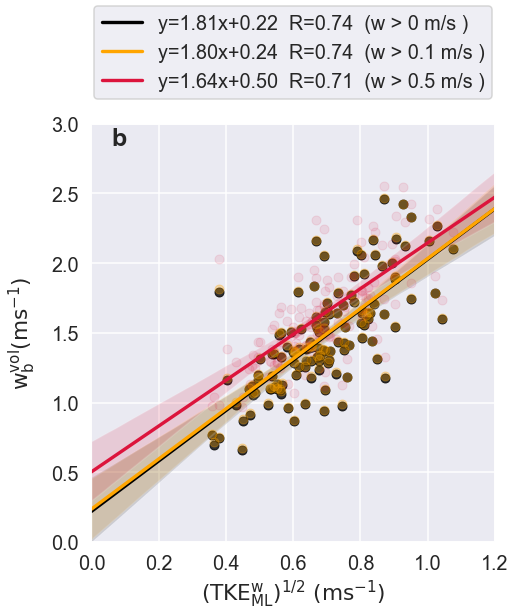

In [12]:
sns.set(context="talk", style="ticks", font_scale=1.2)
sns.set_style("darkgrid")

fig, axs = plt.subplots(1,1,figsize=[7, 7])

fig.tight_layout(w_pad=2., h_pad=2.5)

#fig1
x = np.sqrt(0.5*wwml[ind])
y = wb_2nd_00[ind]


axs.set_ylim((0., 3.))
axs.set_xlim((0., 1.2))

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

sns.regplot(x=x, y=y, ax = axs, line_kws={'label':"y={0:.2f}x+{1:.2f}  R={2:.2f}  (w > 0 m/s )".format(slope,intercept,r_value), "color": "black"},
           scatter_kws={"color": "black"}, truncate=False)

x = np.sqrt(0.5*wwml[ind])
y = wb_2nd_01[ind]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

sns.regplot(x=x, y=y, ax = axs, scatter = True, truncate=False, line_kws={'label':"y={0:.2f}x+{1:.2f}  R={2:.2f}  (w > 0.1 m/s )".format(slope,intercept,r_value), "color": "orange"},
           scatter_kws={"color": "orange", 'alpha': 0.3})

x = np.sqrt(0.5*wwml[ind])
y = wb_2nd_05[ind]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

sns.regplot(x=x, y=y, ax = axs, scatter = True, truncate=False, line_kws={'label':"y={0:.2f}x+{1:.2f}  R={2:.2f}  (w > 0.5 m/s )".format(slope,intercept,r_value), "color": "crimson"},
           scatter_kws={"color": "crimson", 'alpha': 0.1})

axs.legend(loc='center', bbox_to_anchor=(0.5, 1.17))


axs.set_xlabel(r"$\mathrm{(TKE^w_{ML})^{1/2} \ (ms^{-1})}$")
axs.set_ylabel(r"$\mathrm{w^{vol}_b (ms^{-1})}$", labelpad=13)

axs.text(0.05, 0.95, 'b', transform=axs.transAxes,fontsize=25, fontweight='bold')

plt.show()

In [32]:
x.shape

(1, 128)

In [33]:
p, V = np.polyfit(x, y, 1, cov=True)

print("x_1: {} +/- {}".format(p[0], np.sqrt(V[0][0])))
print("x_2: {} +/- {}".format(p[1], np.sqrt(V[1][1])))

TypeError: expected 1D vector for x

In [8]:
from scipy.optimize import curve_fit

In [9]:
#generate table
nrow = 6

slope_tbl = np.zeros(nrow)
transact_tbl = np.zeros(nrow)

slope_err_tbl = np.zeros(nrow)
transact_err_tbl = np.zeros(nrow)

slope_force0_tbl = np.zeros(nrow)
slope_force0_err_tbl = np.zeros(nrow)

corr_tbl = np.zeros(nrow)
p_tbl = np.zeros(nrow)
std_err_tbl = np.zeros(nrow)

In [10]:
x = np.sqrt(0.5*wwml[ind])
y = wb_1st_00[ind]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

slope_tbl[0] = slope
transact_tbl[0] = intercept
corr_tbl[0] = r_value
std_err_tbl[0] = std_err

p, V = np.polyfit(x, y, 1, cov=True)
slope_err_tbl[0] = np.sqrt(V[0][0])
transact_err_tbl[0] = np.sqrt(V[1][1])

In [11]:
def fit_func(x, a):
    # Curve fitting function
    return a * x  # d=0 is implied

In [12]:
params = curve_fit(fit_func, x, y)
perr = np.sqrt(np.diag(params[1]))

In [13]:
params

(array([1.19617026]), array([[0.00035022]]))

In [14]:
x = np.sqrt(0.5*wwml[ind])
y = wb_1st_01[ind]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

slope_tbl[1] = slope
transact_tbl[1] = intercept
corr_tbl[1] = r_value
std_err_tbl[1] = std_err

p, V = np.polyfit(x, y, 1, cov=True)
slope_err_tbl[1] = np.sqrt(V[0][0])
transact_err_tbl[1] = np.sqrt(V[1][1])

In [15]:
x = np.sqrt(0.5*wwml[ind])
y = wb_1st_05[ind]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

slope_tbl[2] = slope
transact_tbl[2] = intercept
corr_tbl[2] = r_value
std_err_tbl[2] = std_err

p, V = np.polyfit(x, y, 1, cov=True)
slope_err_tbl[2] = np.sqrt(V[0][0])
transact_err_tbl[2] = np.sqrt(V[1][1])

In [16]:
x = np.sqrt(0.5*wwml[ind])
y = wb_2nd_00[ind]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

slope_tbl[3] = slope
transact_tbl[3] = intercept
corr_tbl[3] = r_value
std_err_tbl[3] = std_err

p, V = np.polyfit(x, y, 1, cov=True)
slope_err_tbl[3] = np.sqrt(V[0][0])
transact_err_tbl[3] = np.sqrt(V[1][1])

In [17]:
params = curve_fit(fit_func, x, y)
perr = np.sqrt(np.diag(params[1]))

In [18]:
params

(array([2.11377444]), array([[0.00105359]]))

In [19]:
x = np.sqrt(0.5*wwml[ind])
y = wb_2nd_01[ind]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

slope_tbl[4] = slope
transact_tbl[4] = intercept
corr_tbl[4] = r_value
std_err_tbl[4] = std_err

p, V = np.polyfit(x, y, 1, cov=True)
slope_err_tbl[4] = np.sqrt(V[0][0])
transact_err_tbl[4] = np.sqrt(V[1][1])

In [20]:
x = np.sqrt(0.5*wwml[ind])
y = wb_2nd_05[ind]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

slope_tbl[5] = slope
transact_tbl[5] = intercept
corr_tbl[5] = r_value
std_err_tbl[5] = std_err

p, V = np.polyfit(x, y, 1, cov=True)
slope_err_tbl[5] = np.sqrt(V[0][0])
transact_err_tbl[5] = np.sqrt(V[1][1])

In [21]:
print(slope_tbl)
print(slope_err_tbl)
print(transact_tbl)
print(transact_err_tbl)

print(corr_tbl)
print(std_err_tbl)

[1.03942271 1.0395031  0.97852163 1.80892017 1.79769815 1.64248658]
[0.08544124 0.08693489 0.09496635 0.14765948 0.14754534 0.14417001]
[0.11316427 0.20279646 0.60600138 0.22009029 0.23622504 0.50359566]
[0.06021633 0.06126901 0.06692933 0.10406581 0.10398537 0.10160654]
[0.73494143 0.72907944 0.67623513 0.7372969  0.73545993 0.71233114]
[0.08544124 0.08693489 0.09496635 0.14765948 0.14754534 0.14417001]
